Name-Jagtap kaustubh

roll no - 09

prn-22SC114501064

TITLE-Transparency in AI Decision-Making

In [4]:
# 1. Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
# 2. Load the dataset
df = pd.read_csv("/content/heart_disease_data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


In [7]:
# Import pandas
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/heart_disease_data.csv")

# Get the total count of heart disease vs not disease patients
print(df['target'].value_counts())

target
1    330
0    276
Name: count, dtype: int64


In [8]:
# 3. Explore the data
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())
print(df['target'].value_counts())

Dataset Shape: (606, 14)
Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   48    1   0       130   256    1        0      150      1      0.0      2   
1   61    1   0       148   203    0        1      161      0      0.0      2   
2   44    0   2       118   242    0        1      149      0      0.3      1   
3   47    1   0       110   275    0        0      118      1      1.0      1   
4   56    1   3       120   193    0        0      162      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   1     3       0  
2   1     2       1  
3   1     2       0  
4   0     3       1  
target
1    330
0    276
Name: count, dtype: int64


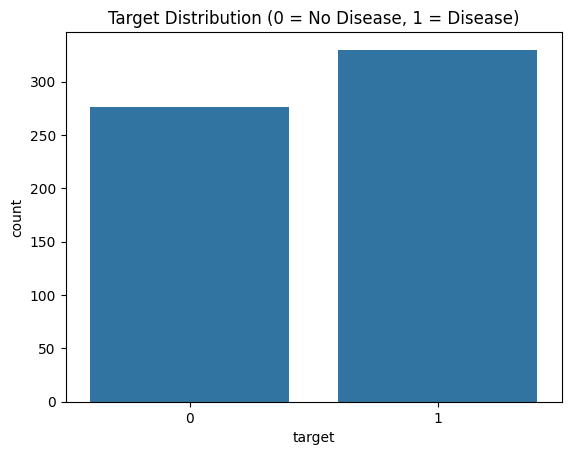

In [9]:
# 4. Visualize target distribution
sns.countplot(x='target', data=df)
plt.title("Target Distribution (0 = No Disease, 1 = Disease)")
plt.show()

In [10]:

# 5. Split data into features and target
X = df.drop(['target'], axis=1)
y = df['target']

In [11]:
# 6. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)


In [13]:
# 8. Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=5)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("\n🔸 Decision Tree Classification Report")
print(classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))


🔸 Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.94      0.97        71

    accuracy                           0.97       122
   macro avg       0.96      0.97      0.97       122
weighted avg       0.97      0.97      0.97       122

Accuracy: 0.9672131147540983


In [14]:
# 9. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=5)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


 Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        51
           1       0.92      0.97      0.95        71

    accuracy                           0.93       122
   macro avg       0.94      0.93      0.93       122
weighted avg       0.94      0.93      0.93       122

Accuracy: 0.9344262295081968


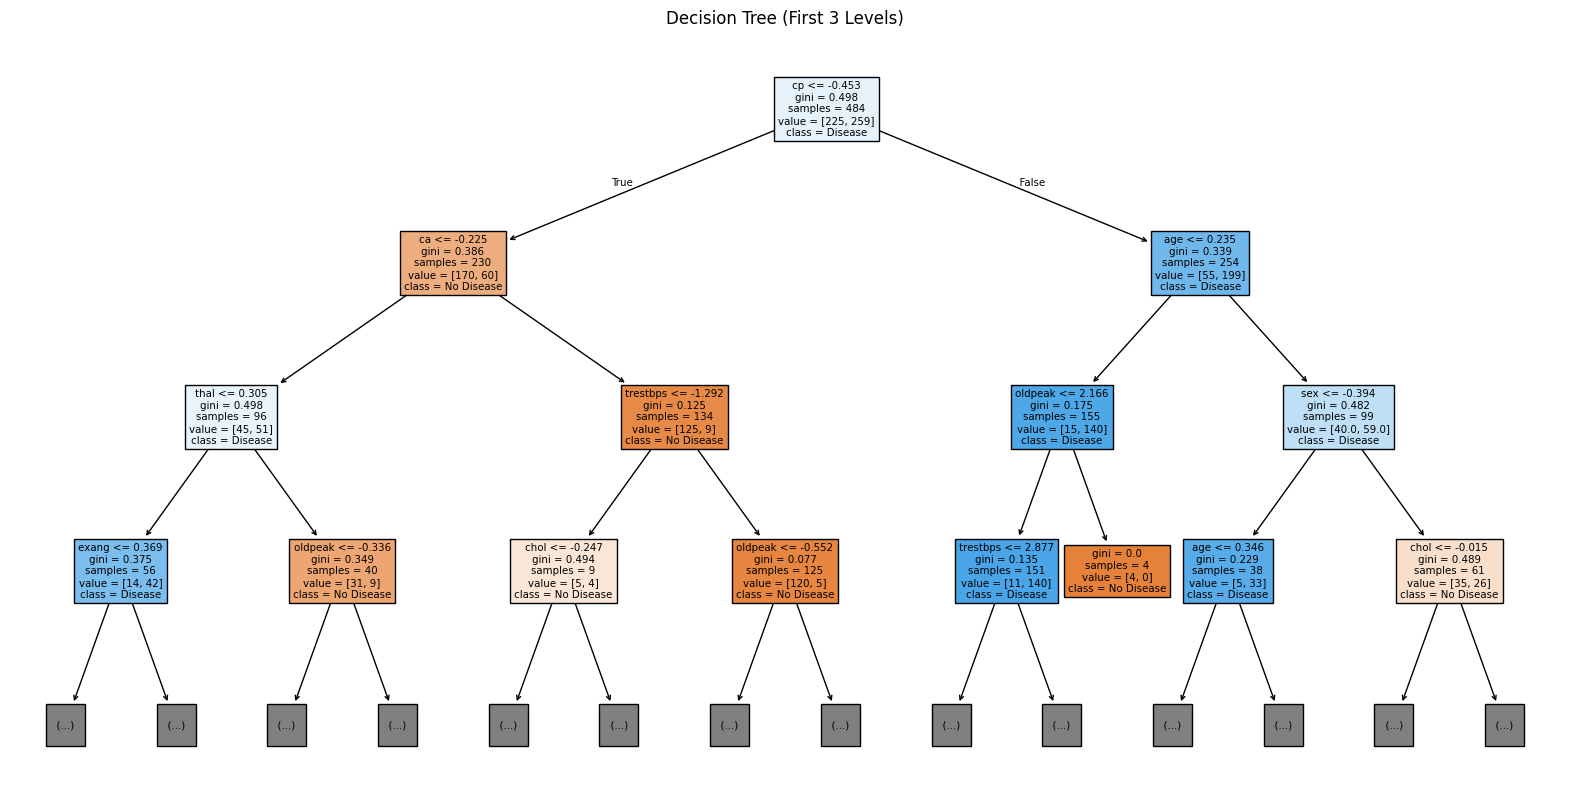

In [15]:
# Visualize the decision tree (top 3 levels only)
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=df.columns[:-1], class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()
